In [ ]:
# importing libs
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DRIVE_DATASETS/perosonalWork/insurance_claims.csv")

In [ ]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

In [ ]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

Testing: Count the occurrences of each value in the 'collision_type' column

In [ ]:
df.replace('?', np.nan, inplace = True)

dataset has missing values as "?" we are going to replace these values with nan values

In [ ]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

check missing values

In [ ]:
df.drop("_c39",1,inplace=True)

<ipython-input-59-1e56d6ffa27e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop("_c39",1,inplace=True)


col _c39 have 1k null values we are going to drop that col

These column has null values as '?' we are goint to replace ? with np.nan <br>
police_report_available -- 343 <br>
property_damage -- 360 <br>
collision_type  -- 178 <br>


In [ ]:
df['police_report_available'].value_counts(dropna=False)

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

Checking Nan values

In [ ]:
df['property_damage'].value_counts(dropna=False)

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

Checking Nan values

In [ ]:
df["collision_type"].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Checking Nan values

In [ ]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

we are going replace nan values with most occured values from the column

In [ ]:
df[['property_damage', 'collision_type', 'police_report_available']].isna().sum()

property_damage            0
collision_type             0
police_report_available    0
dtype: int64

Re checking null values

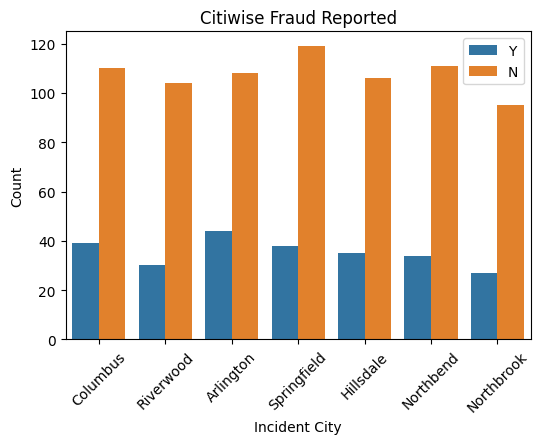

In [ ]:
# incident_city

plt.figure(figsize=(6,4))
sns.countplot(x=df['incident_city'],hue=df["fraud_reported"]).set(title="Citiwise Fraud Reported",xlabel="Incident City",ylabel="Count")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define functions for creating new features based on 'age'
def age_range(x):
    if x <20:
        return "Young"
    elif x > 20 and x < 60:
        return "Adult"
    else:
        return "Senior"

# Define functions for creating new features based on 'incident_hour_of_the_day'
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'


df["age_range"] = df["age"].apply(age_range)
df["time_of_day"] = df["incident_hour_of_the_day"].apply(categorize_time)

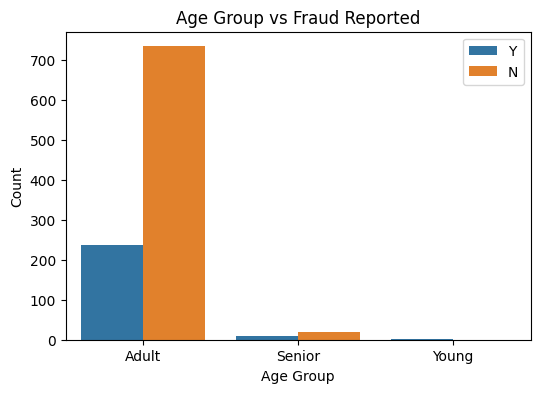

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["age_range"],hue = df["fraud_reported"]).set(title="Age Group vs Fraud Reported",xlabel="Age Group",ylabel="Count")
plt.legend(loc='upper right')
plt.show()

lets plot age_range vs fraud_reported <br>
As we can see False Fraude reported by the adult as compare to Senior and Yound Category

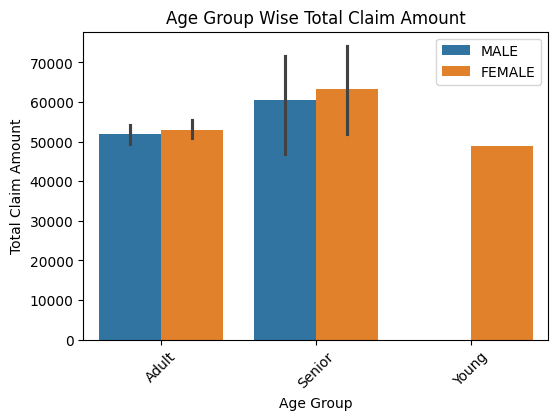

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["age_range"], y=df['total_claim_amount'],hue=df["insured_sex"]).set(title="Age Group Wise Total Claim Amount", xlabel="Age Group",ylabel="Total Claim Amount" )
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

Here we can see total claim amount for Senior category is max

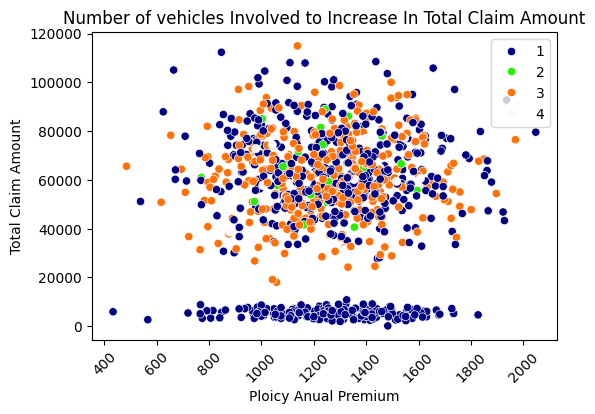

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="policy_annual_premium",y="total_claim_amount",hue="number_of_vehicles_involved",palette="gist_ncar").set(title="Number of vehicles Involved to Increase In Total Claim Amount", xlabel="Ploicy Anual Premium",ylabel="Total Claim Amount" )
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

Number of vehicles involved for increase in total claim amount



In [ ]:
# Here we are going to classify hobbies in to indoor and outdoor games (Games which we can play iside dont need to travel vs games which need to travel)
in_games = ['reading',  'video-games', 'chess']
out_games =   ['paintball', 'bungie-jumping', 'golf', 'camping', 'kayaking', 'yachting',
                     'hiking', 'skydiving', 'base-jumping', 'polo', 'basketball','exercise', 'paintball', 'movies', 'golf', 'camping']

def clf_games(value):
    if value in in_games:
        return "in_games"
    return "out_games"
df["games"]  =  df["insured_hobbies"].apply(clf_games)

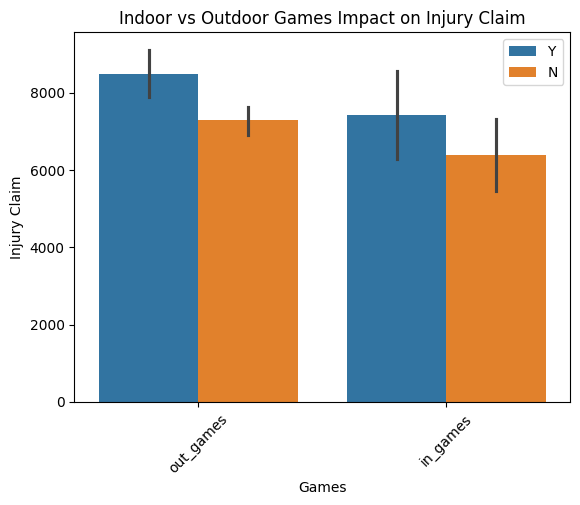

In [ ]:
# plt.figure(figsize=(6,4))
sns.barplot(data=df, x ="games" ,y="injury_claim",hue="fraud_reported").set(title="Indoor vs Outdoor Games Impact on Injury Claim",xlabel="Games",ylabel="Injury Claim")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

##### Graph Person we goes outside for playing 'golf, skdiving' etc has injury claim more as compared to person who do 'reading',  'video-games', 'chess'

In [ ]:

to_drop =  ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']

df.drop(to_drop,axis = 1,inplace=True)

Dropping columns which are not necessary for prediction


<ipython-input-330-ba61737bfdd7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


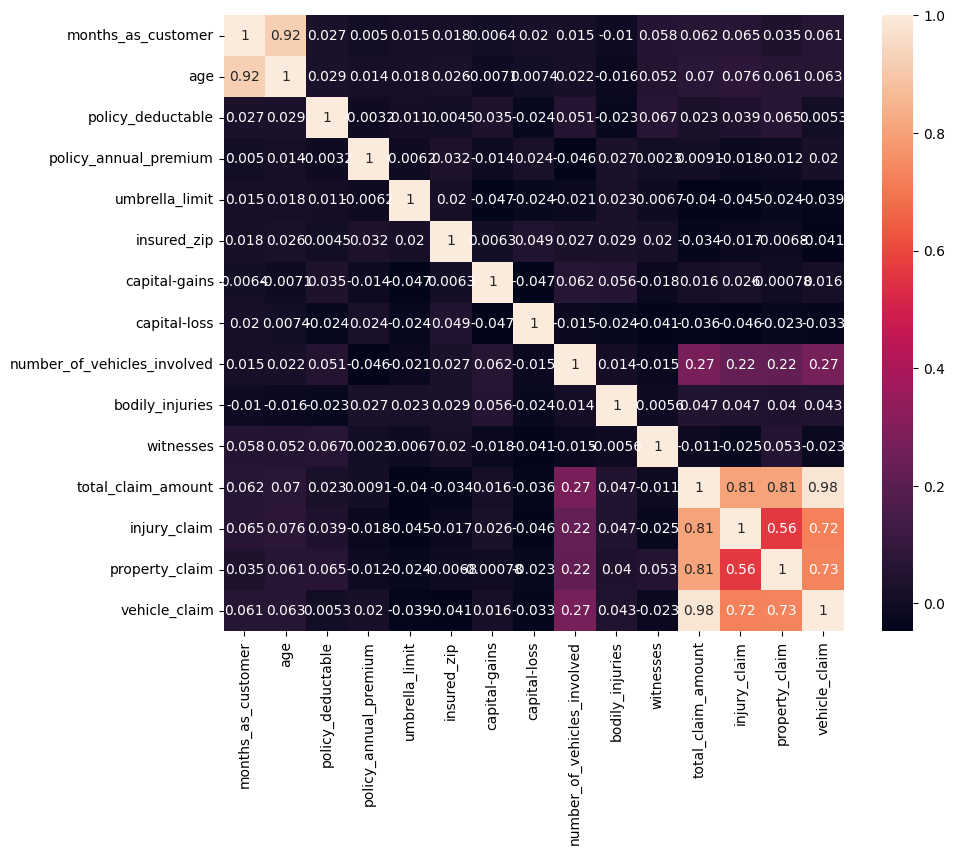

In [ ]:
# checking for multicollinearity
plt.figure(figsize = (10, 8))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g')
plt.show()

When 1 independent feature(X1) is highly correlated with the other independent feature(X2) , than this situation is called as Multicollinearity. Here correlation means when there is a change in 1 feature than it affects the other feature as well. Correlation can be both positive as well as negative. For example , when X1 is increasing then X2 is also increasing shows the positive correlation whereas when X2 is decreasing than it is a case of Negative correlation.

Due to the presence of collinearity/multi-collinearity, it becomes difficult to isolate the individual effects of explanatory variables on the response variable.


In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

 we are going to drop "age" &  "total_claim_amount" because these two column has multicollinearity with other cols
"age" has multicollinearity with "months_as_customer"   & "total_claim_amount" has multicollinearity with  "injury_claim, property_claim, vehicle_claim "


Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model.

This means that one independent variable can be predicted from another in a regression model. For example, sets like height and weight, household income and water consumption, mileage and the price of a car, study time and leisure time, etc.

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)


Converting months_as_customer so we dont need to create extra columns while getting one hot encoded values

In [ ]:
required_columns = ['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported', 'age_range',
       'months_as_customer_groups']

In [ ]:
# selecting only req columns
final_df = df[required_columns]

In [ ]:
final_df.select_dtypes("O").columns.to_list()

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'fraud_reported',
 'age_range']

Taking only Categorical values to get one hot encoded values

In [ ]:
cat_cols = ['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'age_range','months_as_customer_groups']

In [ ]:
new_df = pd.get_dummies(final_df, columns = cat_cols )


One Hot Encoding

Above we perfrmed on hot encoding on categorical columns

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

The advantages of using one hot encoding include:

It allows the use of categorical variables in models that require numerical input.
It can improve model performance by providing more information to the model about the categorical variable.
It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df["fraud_reported"]=  le.fit_transform(new_df["fraud_reported"])

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [ ]:
le.classes_

array(['N', 'Y'], dtype=object)

printing classes of target variable

In [ ]:
X = new_df.drop("fraud_reported",1)
Y = new_df["fraud_reported"]

<ipython-input-79-4444542001e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = new_df.drop("fraud_reported",1)


Split the data into features (X) and target variable (Y) for Training

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

Split the data into training and testing sets

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

Scaling Dataset
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

[Text(0.5, 1.0, 'Frud Reported Count')]

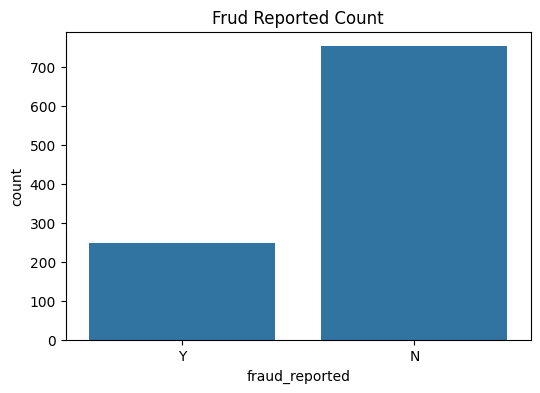

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=final_df, x="fraud_reported").set(title="Frud Reported Count")

Imbalance dataset <br>
When a dataset is imbalanced, several issues may arise. Models may exhibit bias toward the majority class, resulting in poor predictions for the minority class. Accuracy as an evaluation metric can be misleading, as it may appear high while the model's performance on the minority class is lacking. <br>
We have to blance this dataset or it may perform good only in  majority class scenarios.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=24)
new_x,new_y = sm.fit_resample(x_train_scaled,y_train)

Address class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

<Axes: xlabel='fraud_reported', ylabel='count'>

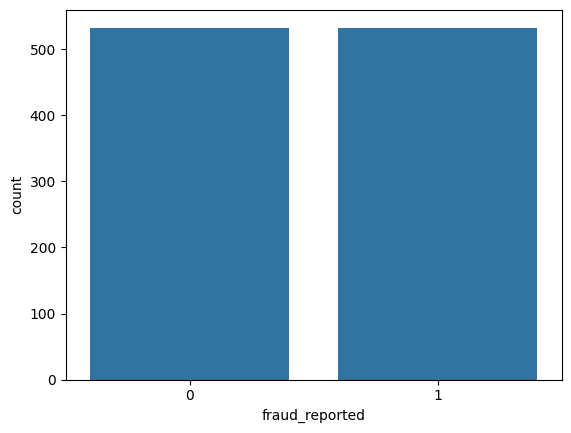

In [ ]:
sns.countplot(data=final_df,x=new_y)

Visualize the balanced dataset After SMOTE
Dataset is blanced now

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

    Precision focuses on the accuracy of positive predictions.
    Recall focuses on capturing all actual positive instances.
    Accuracy provides an overall measure of correctness, considering both positive and negative predictions.

These metrics are useful for understanding different aspects of a classification model's performance, and the choice of which to prioritize depends on the specific goals and requirements of the application.

A classification report is a comprehensive summary of the performance of a classification model. It typically includes several metrics, including precision, recall, F1-score, and support, for each class in the dataset. This report is useful for gaining insights into how well the model is performing on different classes and can help identify areas that may need improvement.

In [ ]:
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(new_x,new_y)
y_pred = lr.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       221
           1       0.62      0.78      0.69        79

    accuracy                           0.82       300
   macro avg       0.77      0.81      0.78       300
weighted avg       0.84      0.82      0.82       300



In [ ]:
# Model Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(new_x,new_y)

y_pred = rf.predict(x_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       221
           1       0.56      0.56      0.56        79

    accuracy                           0.77       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.77      0.77      0.77       300



In [ ]:
# Model K Neares Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(new_x,new_y)
knn.score(x_test_scaled,y_test)

y_pred = knn.predict(x_test_scaled)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.54      0.68       221
           1       0.39      0.82      0.53        79

    accuracy                           0.62       300
   macro avg       0.64      0.68      0.60       300
weighted avg       0.76      0.62      0.64       300



In [ ]:
import joblib

Saving Model Using Joblib Library <br>
To load the model we have to use same library

In [ ]:
joblib.dump(lr,"logisticRegression.pkl")

['logisticRegression.pkl']

In [ ]:
joblib.dump(rf,"RandomForrest.pkl")

['RandomForrest.pkl']

In [ ]:
joblib.dump(knn,"KNN.pkl")

['KNN.pkl']